In [1]:
import pandas as pd

# Producto 1: Préstamo Personal

In [2]:
df_PP = pd.read_csv('PP_Segmentado_ABC.csv')

In [3]:
df_PP

,Socio,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Pago_M0,Limite_credito,Genero,ESTADO,...,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1,L2_Saldo_Mes,L2_Pago,Segmento_ABC
0,BOD,4,68086.86,68086.86,68086.86,15.130413,NaN,4500.0,M,EM,...,56,0,0,0,0,0,0,73701.086634,0.0,A
1,BOD,15,39558.87,39558.87,39558.87,15.823548,NaN,2500.0,M,GRO,...,62,0,0,0,0,0,0,67215.740776,0.0,A
2,GCC,17,36364.76,36364.76,36364.76,3.827869,NaN,9500.0,F,GRO,...,49,0,0,0,0,0,0,62592.930267,0.0,A
3,GCC,17,32796.07,32796.07,32796.07,3.999521,NaN,8200.0,F,GRO,...,59,0,0,0,0,0,0,55957.640182,0.0,A
4,BOD,14,34526.00,33490.35,33490.35,7.192917,NaN,4800.0,M,GRO,...,62,0,0,0,0,0,0,55222.334312,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126110,BOD,2,691.01,202.63,202.63,0.072738,692.0,9500.0,F,DF,...,38,0,0,0,0,0,0,229.211467,0.0,C
126111,CYA,62,119.01,119.01,119.01,0.019478,NaN,6110.0,F,GRO,...,30,0,0,0,0,0,0,170.517831,0.0,C
126112,CYA,34,124.61,124.61,124.61,0.062305,125.0,2000.0,M,DF,...,50,0,0,0,0,0,0,124.610000,0.0,C
126113,GCC,9,68.31,68.31,68.31,0.013394,NaN,5100.0,M,GTO,...,31,0,0,0,0,0,0,121.618722,0.0,C


## Droppear columnas: 

- Todas las columnas que tengan que ver con Mes 0

- La variable objetivo M1

- Los canales de pago

- Saldos totales (introducen ruido al modelo), 

(además variable norma de saldo L2_saldo_Mes captura mejor la cantidad de saldo de una observación)


Esto  porquer vamos a predecir pago_m1 dados (mes_2, mes_3, ..., Mes_6)

In [4]:
columns_m0 = ['Saldo_total', 'Saldo_Mes', 'Pago_minimo_M0', 'Utilizacion', 'Pago_M0', 'Variable_objetivo', 'Variable_Objetivo_m1', 'L2_Pago', 'dias_deudados_m0', 'Canal_Pago_M1','Canal_Pago_M2','Canal_Pago_M3','Canal_Pago_M4','Canal_Pago_M5','Canal_Pago_M6', 'Saldo_total_M1', 'Saldo_total_M2','Saldo_total_M3', 'Saldo_total_M4', 'Saldo_total_M5', 'Saldo_total_M6']

df_PP_0 = df_PP.drop(columns = columns_m0).copy()

In [5]:
df_PP_0.columns

Index(['Socio', 'Mob', 'Limite_credito', 'Genero', 'ESTADO', 'Saldo_Mes_M1',
       'Saldo_Mes_M2', 'Saldo_Mes_M3', 'Saldo_Mes_M4', 'Saldo_Mes_M5',
       'Saldo_Mes_M6', 'Pago_minimo_M1', 'Pago_minimo_M2', 'Pago_minimo_M3',
       'Pago_minimo_M4', 'Pago_minimo_M5', 'Pago_minimo_M6', 'Utilizacion_M1',
       'Utilizacion_M2', 'Utilizacion_M3', 'Utilizacion_M4', 'Utilizacion_M5',
       'Utilizacion_M6', 'Pago_M1', 'Pago_M2', 'Pago_M3', 'Pago_M4', 'Pago_M5',
       'Pago_M6', 'dias_deudados_m6', 'dias_deudados_m5', 'dias_deudados_m4',
       'dias_deudados_m3', 'dias_deudados_m2', 'dias_deudados_m1', 'Edad',
       'Variable_Objetivo_m6', 'Variable_Objetivo_m5', 'Variable_Objetivo_m4',
       'Variable_Objetivo_m3', 'Variable_Objetivo_m2', 'L2_Saldo_Mes',
       'Segmento_ABC'],
      dtype='object')

In [6]:
df_PP_1 = pd.get_dummies(df_PP_0, drop_first=True)
df_PP_1 = df_PP_1[df_PP_1['Pago_M1'] >= 0]

In [7]:
df_PP_1.columns

Index(['Mob', 'Limite_credito', 'Saldo_Mes_M1', 'Saldo_Mes_M2', 'Saldo_Mes_M3',
       'Saldo_Mes_M4', 'Saldo_Mes_M5', 'Saldo_Mes_M6', 'Pago_minimo_M1',
       'Pago_minimo_M2', 'Pago_minimo_M3', 'Pago_minimo_M4', 'Pago_minimo_M5',
       'Pago_minimo_M6', 'Utilizacion_M1', 'Utilizacion_M2', 'Utilizacion_M3',
       'Utilizacion_M4', 'Utilizacion_M5', 'Utilizacion_M6', 'Pago_M1',
       'Pago_M2', 'Pago_M3', 'Pago_M4', 'Pago_M5', 'Pago_M6',
       'dias_deudados_m6', 'dias_deudados_m5', 'dias_deudados_m4',
       'dias_deudados_m3', 'dias_deudados_m2', 'dias_deudados_m1', 'Edad',
       'Variable_Objetivo_m6', 'Variable_Objetivo_m5', 'Variable_Objetivo_m4',
       'Variable_Objetivo_m3', 'Variable_Objetivo_m2', 'L2_Saldo_Mes',
       'Socio_CYA', 'Socio_GCC', 'Socio_PRO', 'Socio_SHA', 'Genero_M',
       'ESTADO_?', 'ESTADO_AGS', 'ESTADO_BCN', 'ESTADO_BCS', 'ESTADO_CAM',
       'ESTADO_CDM', 'ESTADO_CHI', 'ESTADO_CHS', 'ESTADO_CMX', 'ESTADO_COA',
       'ESTADO_COL', 'ESTADO_DF', 'ESTAD

## Partición de variables

No todas las varaiables son dependientes del tiempo, por lo tanto no todas se introducirán en las capas recurrentes de la red neuronal, si no en un MLP sencillo.

### Variables temporales:

##### Con 6 meses:

- saldo mes
- pago mínimo
- utilización
- días deudados

##### Con 5 meses:

- pago
- variable objetivo

(no incluyen mes 1 justamente porque es lo que queremos predecir)

### Variables estáticas 

- mob
- límite de crédoto
- edad
- norma saldo
- Socio (dummies)
- Estado (dummies)
- Segmento (dummies)

### Variable Objetivo

- Pago mes 1

In [8]:
# Variables Temporales

saldo_mes_tv = ['Saldo_Mes_M1', 'Saldo_Mes_M2', 'Saldo_Mes_M3', 'Saldo_Mes_M4'
                ,'Saldo_Mes_M5', 'Saldo_Mes_M6']

pago_minimo_tv = ['Pago_minimo_M1', 'Pago_minimo_M2','Pago_minimo_M3', 'Pago_minimo_M4', 
                  'Pago_minimo_M5', 'Pago_minimo_M6']

utilizacion_tv = ['Utilizacion_M1', 'Utilizacion_M2', 'Utilizacion_M3', 'Utilizacion_M4',
                  'Utilizacion_M5', 'Utilizacion_M6']

pago_tv = ['Pago_M2', 'Pago_M3', 'Pago_M4', 'Pago_M5', 'Pago_M6']

dias_deudados_tv = ['dias_deudados_m1', 'dias_deudados_m2','dias_deudados_m3', 'dias_deudados_m4', 'dias_deudados_m5','dias_deudados_m6']

variable_objetivo_tv = ['Variable_Objetivo_m2','Variable_Objetivo_m3', 'Variable_Objetivo_m4', 'Variable_Objetivo_m5','Variable_Objetivo_m6']

# Variables Estáticas

variables_static = ['Mob', 'Limite_credito', 'Edad', 'L2_Saldo_Mes', 'Socio_CYA', 'Socio_GCC',
       'Socio_PRO', 'Socio_SHA', 'Genero_M', 'ESTADO_?', 'ESTADO_AGS',
       'ESTADO_BCN', 'ESTADO_BCS', 'ESTADO_CAM', 'ESTADO_CDM', 'ESTADO_CHI',
       'ESTADO_CHS', 'ESTADO_CMX', 'ESTADO_COA', 'ESTADO_COL', 'ESTADO_DF',
       'ESTADO_DGO', 'ESTADO_EDM', 'ESTADO_EM', 'ESTADO_EM.', 'ESTADO_GRO',
       'ESTADO_GTO', 'ESTADO_GUA', 'ESTADO_HGO', 'ESTADO_JAL', 'ESTADO_MEX',
       'ESTADO_MIC', 'ESTADO_MOR', 'ESTADO_NAY', 'ESTADO_NL', 'ESTADO_NVL',
       'ESTADO_OAX', 'ESTADO_PUE', 'ESTADO_QR', 'ESTADO_QR.', 'ESTADO_QRO',
       'ESTADO_SIN', 'ESTADO_SLP', 'ESTADO_SON', 'ESTADO_TAB', 'ESTADO_TAM',
       'ESTADO_TLA', 'ESTADO_VER', 'ESTADO_YUC', 'ESTADO_ZAC',
       'Segmento_ABC_B', 'Segmento_ABC_C']

obj_variable = ['Pago_M1']

### Para simplificación del modelo, omitiremos el estado y el socio

In [9]:
variables_static = ['Limite_credito', 'Edad', 'L2_Saldo_Mes', 'Segmento_ABC_B', 'Segmento_ABC_C']

In [10]:
# df_PP_1.info()

In [10]:
df_PP_2 = df_PP_1[df_PP_1['Pago_M1'].notna()].fillna(0)

In [12]:
# df_PP_2.info()

### Dividir en set de entrenamiento y de validadción

In [11]:
from sklearn.model_selection import train_test_split

X, y = df_PP_2[pago_tv+variable_objetivo_tv+saldo_mes_tv+utilizacion_tv+dias_deudados_tv+variables_static], df_PP_2[obj_variable]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)

## Modelo

In [12]:
'''from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(rf.score(X_val, y_val))
'''

import joblib
 
rf = joblib.load('modelos/RF_PP.pkl')

In [87]:
# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

# Sort and get the top 5
top5 = feature_importances.sort_values(by='importance', ascending=False).head(5)

print(top5)

             feature  importance
22  dias_deudados_m1    0.642219
10      Saldo_Mes_M1    0.142668
30      L2_Saldo_Mes    0.058980
23  dias_deudados_m2    0.026780
0            Pago_M2    0.019069


### Métricas del modelo

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Predict with RFR
y_pred = rf.predict(X_val)

print("R2:", r2_score(y_val, y_pred))

print("MAE:", pow(mean_absolute_error(y_val, y_pred), 1))

print("MSE:", pow(mean_squared_error(y_val, y_pred), 1))

R2: 0.9808802560134802
MAE: 18.252446673538973
MSE: 5792.812900150944


c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### Predicciones del modelo

In [89]:
y_pred = rf.predict(X_val[80:100])
y_pred


array([ 802.7952,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
        929.5959,    0.    ,    0.    , 1113.2126,    0.    ,    0.    ,
          0.    ,    0.    ,  657.05  ,    0.    ,  764.8772,    0.    ,
       1824.9635,    0.    ])

In [90]:
y_val[80:100].T

,98890,114353,107020,30899,34328,9919,7040,31308,120389,76558,125985,34430,107857,115690,56608,88247,98387,47328,26933,71370
Pago_M1,850.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,1150.0,0.0,0.0,0.0,0.0,500.0,0.0,760.0,0.0,1000.0,0.0


### Comparación de modelo con alternativa: XGBOOST

In [91]:
'''import xgboost as xgb

xgb_PP = xgb.XGBRFRegressor(random_state=0).fit(
    X_train, y_train)

from sklearn.metrics import mean_absolute_error, r2_score

print("XGB R2:", r2_score(y_val, xgb_PP.predict(X_val)))
print("XGB MAE:", pow(mean_absolute_error(y_val, xgb_PP.predict(X_val)), 1))'''

'import xgboost as xgb\n\nxgb_PP = xgb.XGBRFRegressor(random_state=0).fit(\n    X_train, y_train)\n\nfrom sklearn.metrics import mean_absolute_error, r2_score\n\nprint("XGB R2:", r2_score(y_val, xgb_PP.predict(X_val)))\nprint("XGB MAE:", pow(mean_absolute_error(y_val, xgb_PP.predict(X_val)), 1))'

EL MAE es mayor con XGB; el R2 es menor $\to$ Ranfom Forest sencillo es el mejor modelo

### Modelo: Gráficamente

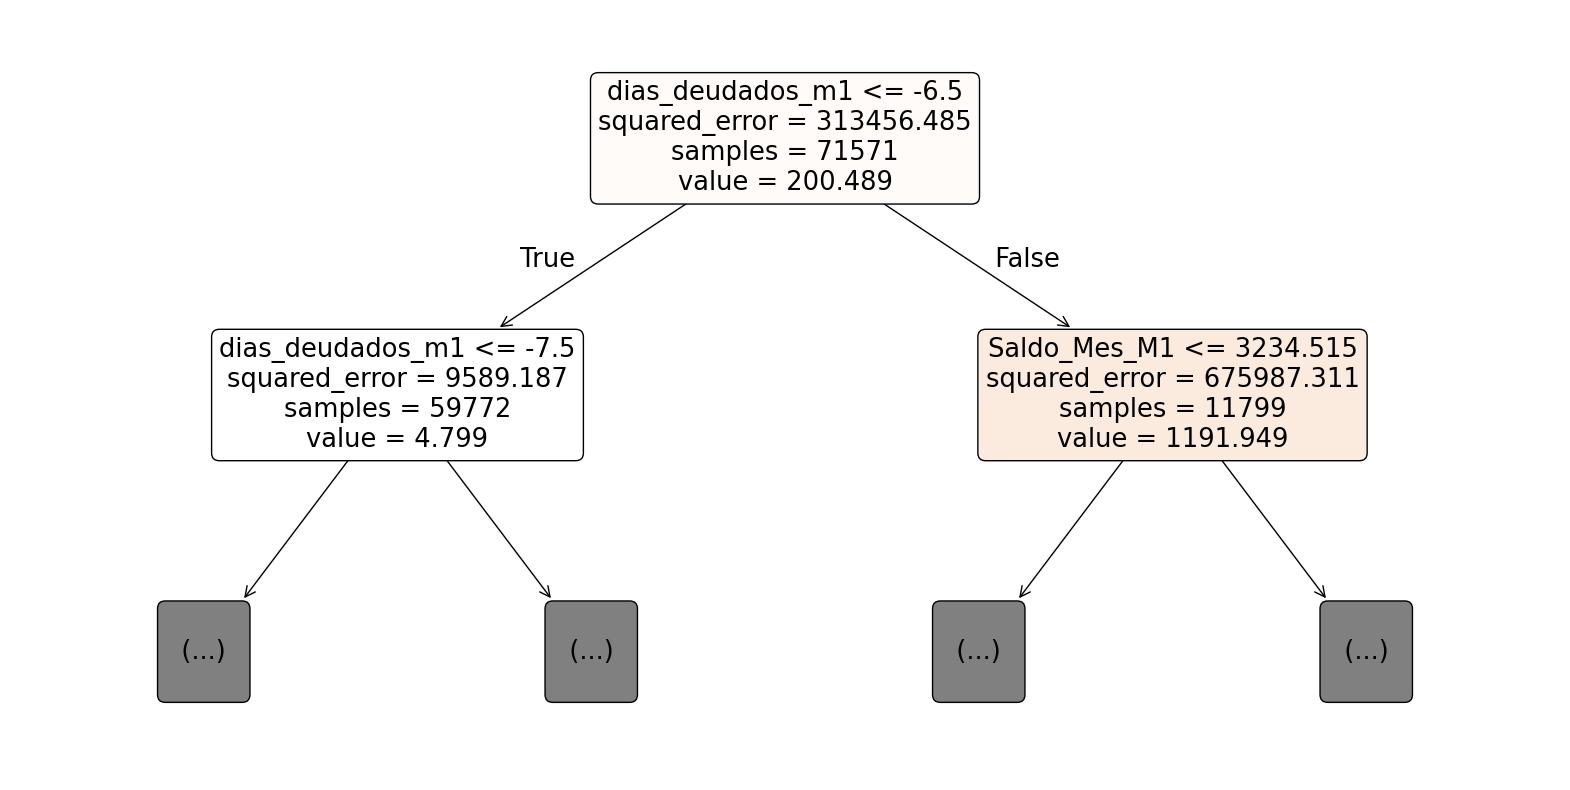

In [92]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X_train.columns,  
          filled=True,
          rounded=True,
          max_depth=1) 
plt.show()

## Interpretación del modelo 

De este primer (mejor) árbol del Random Forest, podemos observar que las variables que, en principio, mejor nos ayudan a determinar cuánto un cliente pagará son las variables: `dias_deudados_m1, dias_deudados_m2, Saldo_Mes_M1, L2_Saldo_Mes, Variable_Objetivo_M2`.

De esto, podemos inferir que la cantidad que un cliente pagará en cada mes se puede predecir mediante:

* Cuantos días ha permanecido en deuda.
* Cuánto saldo tiene en un mes dado.
* Si el mes anterior pagó más del mínimo o no.

# Producto 2: TDC Departamental

In [43]:
df_TDC_D = pd.read_csv('TDC_Dept_Segmentado_ABC.csv')

In [44]:
df_TDC_D.head()

,Socio,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Pago_M0,Limite_credito,Genero,ESTADO,...,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1,L2_Saldo_Mes,L2_Pago,Segmento_ABC
0,CYA,233,103577.89,103577.89,103577.89,207.15578,NaN,500.0,M,QR,...,80,0,0,0,0,0,0,274041.338265,0.0,A
1,CYA,232,103577.89,103577.89,103577.89,207.15578,NaN,500.0,M,QR,...,80,0,0,0,0,0,0,253712.979134,0.0,A
2,CYA,231,103577.89,103577.89,103577.89,207.15578,NaN,500.0,M,QR,...,80,0,0,0,0,0,0,253712.979134,0.0,A
3,CYA,230,103577.89,103577.89,103577.89,207.15578,NaN,500.0,M,QR,...,80,0,0,0,0,0,0,253712.979134,0.0,A
4,CYA,228,103577.89,103577.89,103577.89,207.15578,NaN,500.0,M,QR,...,80,0,0,0,0,0,0,231607.203006,0.0,A


## Droppear columnas: 

- Todas las columnas que tengan que ver con Mes 0

- La variable objetivo M1

- Los canales de pago

Esto  porquer vamos a predecir pago_m1 dados (mes_2, mes_3, ..., Mes_6)

In [45]:
df_TDC_D_0 = df_TDC_D.drop(columns = columns_m0 + ['Behavior_M1', 'Behavior']).copy()

df_TDC_D_0.columns

Index(['Socio', 'Mob', 'Limite_credito', 'Genero', 'ESTADO', 'Saldo_Mes_M1',
       'Saldo_Mes_M2', 'Saldo_Mes_M3', 'Saldo_Mes_M4', 'Saldo_Mes_M5',
       'Saldo_Mes_M6', 'Pago_minimo_M1', 'Pago_minimo_M2', 'Pago_minimo_M3',
       'Pago_minimo_M4', 'Pago_minimo_M5', 'Pago_minimo_M6', 'Utilizacion_M1',
       'Utilizacion_M2', 'Utilizacion_M3', 'Utilizacion_M4', 'Utilizacion_M5',
       'Utilizacion_M6', 'Behavior_M2', 'Behavior_M3', 'Behavior_M4',
       'Behavior_M5', 'Behavior_M6', 'Pago_M1', 'Pago_M2', 'Pago_M3',
       'Pago_M4', 'Pago_M5', 'Pago_M6', 'dias_deudados_m6', 'dias_deudados_m5',
       'dias_deudados_m4', 'dias_deudados_m3', 'dias_deudados_m2',
       'dias_deudados_m1', 'Edad', 'Variable_Objetivo_m6',
       'Variable_Objetivo_m5', 'Variable_Objetivo_m4', 'Variable_Objetivo_m3',
       'Variable_Objetivo_m2', 'L2_Saldo_Mes', 'Segmento_ABC'],
      dtype='object')

In [46]:
df_TDC_D_1 = pd.get_dummies(df_TDC_D_0, drop_first=True)
df_TDC_D_1 = df_TDC_D_1[df_TDC_D_1['Pago_M1'] >= 0]


In [47]:
df_TDC_D_1.columns

Index(['Mob', 'Limite_credito', 'Saldo_Mes_M1', 'Saldo_Mes_M2', 'Saldo_Mes_M3',
       'Saldo_Mes_M4', 'Saldo_Mes_M5', 'Saldo_Mes_M6', 'Pago_minimo_M1',
       'Pago_minimo_M2',
       ...
       'ESTADO_SON', 'ESTADO_SP', 'ESTADO_TAB', 'ESTADO_TAM', 'ESTADO_TLA',
       'ESTADO_VER', 'ESTADO_YUC', 'ESTADO_ZAC', 'Segmento_ABC_B',
       'Segmento_ABC_C'],
      dtype='object', length=105)

## Partición de variables

(**Revisar primer sección: Producto 1: Prestamo Personal**)

En este caso, la partición es la misma con la adición del behavior de los meses antes del mes 1

In [48]:
behavior_tv = ['Behavior_M2', 'Behavior_M3', 'Behavior_M4', 'Behavior_M5', 'Behavior_M6']

### De nuevo, para simplificación del modelo, omitiremos el estado y el socio

In [49]:
variables_static = ['Limite_credito', 'Edad', 'L2_Saldo_Mes', 'Segmento_ABC_B', 'Segmento_ABC_C']

In [101]:
#df_TDC_D_1[obj_variable + pago_tv+variable_objetivo_tv+saldo_mes_tv+utilizacion_tv+dias_deudados_tv+behavior_tv+variables_static].info()

Un `info()` de los datos nos permite ver lo siguiente:

` Behavior_M2:           225492 non-null  `

` Behavior_M3:           213173 non-null  `

` Behavior_M4:          203002 non-null  `

` Behavior_M5:          192370 non-null  `

` Behavior_M6:          182723 non-null  `

Por lo que se intentarán modelos sin esta variable y llenando los nulls de esta variable con 0

In [50]:
df_TDC_D_2_no_b = df_TDC_D_1[df_TDC_D_1['Pago_M1'].notna()].fillna(0)

df_TDC_D_2_yes_b = df_TDC_D_1[df_TDC_D_1['Pago_M1'].notna()].fillna(0)

### Dividir en set de entrenamiento y de validadción

In [51]:
X_n, y_n = df_TDC_D_2_no_b[pago_tv+variable_objetivo_tv+saldo_mes_tv+utilizacion_tv+dias_deudados_tv+variables_static], df_TDC_D_2_no_b[obj_variable]
X_y, y_y = df_TDC_D_2_yes_b[pago_tv+variable_objetivo_tv+saldo_mes_tv+utilizacion_tv+dias_deudados_tv+behavior_tv+variables_static], df_TDC_D_2_yes_b[obj_variable]

X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_n, y_n, test_size=0.1, random_state=0)
X_train_y, X_val_y, y_train_y, y_val_y = train_test_split(X_y, y_y, test_size=0.1, random_state=0)

## Modelo

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor

rf_n = RandomForestRegressor()
rf_y = RandomForestRegressor()

rf_n.fit(X_train_n, y_train_n)
rf_y.fit(X_train_y, y_train_y)'''
rf_n = joblib.load('modelos/RF_TDC_D.pkl')

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [57]:
# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': X_train_n.columns,
    'importance': rf_n.feature_importances_
})

# Sort and get the top 5
top5 = feature_importances.sort_values(by='importance', ascending=False).head(5)

print(top5)

                 feature  importance
22      dias_deudados_m1    0.545410
0                Pago_M2    0.205125
10          Saldo_Mes_M1    0.048711
23      dias_deudados_m2    0.026226
5   Variable_Objetivo_m2    0.019268


### Comparación (Métricas) de los modelos

In [58]:
y_pred = rf_n.predict(X_val_n)

print(f'R2 Score sin usar behavior: {rf_n.score(X_val_n, y_val_n)}')
# print(f'R2 Score usarndo behavior: {rf_y.score(X_val_y, y_val_y)}')

R2 Score sin usar behavior: 0.8484018836289176


Ambos modelos tienen un R2 similar, probamos con el MAE

In [59]:
print("MAE (no Behavior):", mean_absolute_error(y_val_n, rf_n.predict(X_val_n)))
# print("MAE (Behavior):", mean_absolute_error(y_val_y, rf_y.predict(X_val_y)))

print("MSE:", pow(mean_squared_error(y_val_n, rf_n.predict(X_val_n)), 1))

MAE (no Behavior): 7.777064149664256
MSE: 3460.214060484478


En este caso, parece que no usar behavior es una mejor idea.

* Bonus: El modelo es más simple (tiene menos variables)

### Predicciones del modelo

In [108]:
y_pred = rf_n.predict(X_val_n[80:100])
y_pred


array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    , 760.0798,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ])

In [109]:
y_val_n[80:100].T

,99750,240180,28039,215857,308842,232958,298015,128714,139098,95933,16163,22227,282426,160940,279361,219944,168551,90936,28089,291510
Pago_M1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Producto 3: TDC Visa

In [30]:
df_TDC_V = pd.read_csv('TDC_Visa_Segmentado_ABC.csv')

In [31]:
df_TDC_V.head()

,Socio,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Pago_M0,Limite_credito,Genero,ESTADO,...,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1,L2_Saldo_Mes,L2_Pago,Segmento_ABC
0,BRA,151,85488.45,85488.45,9014.00,0.949872,9050.0,90000.0,M,JAL,...,37,0,0,0,0,0,0,223586.542993,21500.000000,A
1,SUB,95,75568.64,75568.64,15869.42,1.109509,NaN,68110.0,M,TAM,...,30,0,0,0,0,0,0,166124.623360,19859.002996,A
2,SUB,97,90206.24,90206.24,90206.24,1.363662,NaN,66150.0,F,JAL,...,52,0,0,0,0,0,0,164640.000728,7522.196887,A
3,SUB,110,80815.94,80815.94,16782.37,1.221707,NaN,66150.0,F,JAL,...,67,0,0,0,0,0,0,161650.675505,14064.422811,A
4,CYA,63,72296.13,72296.13,72296.13,2.891845,NaN,25000.0,F,EM,...,50,0,0,0,0,0,0,159365.822611,9457.504956,A


## Droppear columnas: 

- Todas las columnas que tengan que ver con Mes 0

- La variable objetivo M1

- Los canales de pago

Esto  porquer vamos a predecir pago_m1 dados (mes_2, mes_3, ..., Mes_6)

In [32]:
df_TDC_V_0 = df_TDC_V.drop(columns = columns_m0 + ['Behavior_M1', 'Behavior']).copy()

df_TDC_V_0.columns

Index(['Socio', 'Mob', 'Limite_credito', 'Genero', 'ESTADO', 'Saldo_Mes_M1',
       'Saldo_Mes_M2', 'Saldo_Mes_M3', 'Saldo_Mes_M4', 'Saldo_Mes_M5',
       'Saldo_Mes_M6', 'Pago_minimo_M1', 'Pago_minimo_M2', 'Pago_minimo_M3',
       'Pago_minimo_M4', 'Pago_minimo_M5', 'Pago_minimo_M6', 'Utilizacion_M1',
       'Utilizacion_M2', 'Utilizacion_M3', 'Utilizacion_M4', 'Utilizacion_M5',
       'Utilizacion_M6', 'Behavior_M2', 'Behavior_M3', 'Behavior_M4',
       'Behavior_M5', 'Behavior_M6', 'Pago_M1', 'Pago_M2', 'Pago_M3',
       'Pago_M4', 'Pago_M5', 'Pago_M6', 'dias_deudados_m6', 'dias_deudados_m5',
       'dias_deudados_m4', 'dias_deudados_m3', 'dias_deudados_m2',
       'dias_deudados_m1', 'Edad', 'Variable_Objetivo_m6',
       'Variable_Objetivo_m5', 'Variable_Objetivo_m4', 'Variable_Objetivo_m3',
       'Variable_Objetivo_m2', 'L2_Saldo_Mes', 'Segmento_ABC'],
      dtype='object')

In [33]:
df_TDC_V_1 = pd.get_dummies(df_TDC_V_0, drop_first=True)
df_TDC_V_1 = df_TDC_V_1[df_TDC_V_1['Pago_M1'] >= 0]


In [34]:
df_TDC_V_1.columns

Index(['Mob', 'Limite_credito', 'Saldo_Mes_M1', 'Saldo_Mes_M2', 'Saldo_Mes_M3',
       'Saldo_Mes_M4', 'Saldo_Mes_M5', 'Saldo_Mes_M6', 'Pago_minimo_M1',
       'Pago_minimo_M2',
       ...
       'ESTADO_TAB', 'ESTADO_TAM', 'ESTADO_TLA', 'ESTADO_TLX', 'ESTADO_VER',
       'ESTADO_YUC', 'ESTADO_ZAC', 'ESTADO_ZPN', 'Segmento_ABC_B',
       'Segmento_ABC_C'],
      dtype='object', length=113)

## Partición de variables

(**Revisar primer sección: Producto 1: Prestamo Personal y segunda sección: Producto 2: TDC Departamental**)

En este caso, la partición es la misma que en la sección 2.

### De nuevo, para simplificación del modelo, omitiremos el estado y el socio

In [35]:
variables_static = ['Limite_credito', 'Edad', 'L2_Saldo_Mes', 'Segmento_ABC_B', 'Segmento_ABC_C']

In [117]:
# df_TDC_V_1[obj_variable + pago_tv+variable_objetivo_tv+saldo_mes_tv+utilizacion_tv+dias_deudados_tv+behavior_tv+variables_static].info()

In [36]:
df_TDC_V_2 = df_TDC_V_1[df_TDC_V_1['Pago_M1'].notna()].fillna(0)

### Dividir en set de entrenamiento y de validadción

In [37]:
X, y = df_TDC_V_2[pago_tv+variable_objetivo_tv+saldo_mes_tv+utilizacion_tv+dias_deudados_tv+variables_static], df_TDC_V_2[obj_variable]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)

## Modelo

In [38]:
'''from sklearn.ensemble import RandomForestRegressor
rf_v = RandomForestRegressor()
rf_v.fit(X_train, y_train)
'''

rf_v = joblib.load('modelos/RF_TDC_V.pkl')

In [121]:
# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_v.feature_importances_
})

# Sort and get the top 5
top5 = feature_importances.sort_values(by='importance', ascending=False).head(5)

print(top5)

             feature  importance
22  dias_deudados_m1    0.444361
0            Pago_M2    0.085296
10      Saldo_Mes_M1    0.079091
30      L2_Saldo_Mes    0.064937
11      Saldo_Mes_M2    0.052801


### Métricas del modelo

In [39]:
# Predict with RFR
y_pred = rf_v.predict(X_val)

print("R2:", r2_score(y_val, y_pred))

print("MAE:", pow(mean_absolute_error(y_val, y_pred), 1))

print("MSE:", pow(mean_squared_error(y_val, y_pred), 1))

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


R2: 0.9484762632289976
MAE: 19.47912660366753
MSE: 12323.48830662922


### Predicciones del modelo

In [123]:
y_pred = rf_v.predict(X_val[80:100])
y_pred


array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    , 692.4211,
         0.    ,   0.    ,   0.    ,   0.    ,  10.    ,   0.    ,
       567.2393,   0.    ])

In [124]:
y_val[80:100].T

,481347,278027,497964,281468,95583,242710,737855,329578,768235,520767,501749,572323,740995,791674,211216,190926,702114,806446,540435,445311
Pago_M1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0


Ocurre lo mismo que en la sección 2 con la variable Behavior, por lo que al tener muchos valores nulos no se usará en el modelo.

# Guardar modelos por si bradescard los ocupa

In [ ]:
import joblib

joblib.dump(rf, "modelos/RF_PP.pkl") 

joblib.dump(rf_n, "modelos/RF_TDC_D.pkl") 

joblib.dump(rf_v, "modelos/RF_TDC_V.pkl") 


['modelos/RF_TDC_V.pkl']

In [128]:
print('PP\n-----------------\n')
print("MAE por fold:", mae_list_1)
print("MSE por fold:", mse_list_1)
print("R² por fold:", r2_list_1)

print('\nTDC Departamental\n-----------------\n')
print("MAE por fold:", mae_list_2)
print("MSE por fold:", mse_list_2)
print("R² por fold:", r2_list_2)

print('\nTDC Visa\n-----------------\n')
print("MAE por fold:", mae_list_3)
print("MSE por fold:", mse_list_3)
print("R² por fold:", r2_list_3)

PP
-----------------

MAE por fold: [46.871677995400844, 43.714810950757276, 43.8975957973198, 42.762109770023784, 43.159196407613, 41.56037728786677, 44.987067168913555, 43.391638001586045, 43.14145585249802, 43.45321]
MSE por fold: [34865.52293719405, 28081.996688954932, 27967.901273491334, 28806.097521824726, 26376.46902467235, 24266.339793769042, 30172.01836267089, 28258.24503748401, 28429.13338122305, 28578.232363803214]
R² por fold: [0.8946561125397591, 0.907257733102171, 0.9068971872804089, 0.9056602135788273, 0.9168383795169939, 0.9185255993940074, 0.9013368370122229, 0.9048110731591161, 0.9138076345925745, 0.9124392189577957]

TDC Departamental
-----------------

MAE por fold: [47.06470606613274, 43.404804321623985, 43.53769203869638, 42.81242924662966, 42.86650402061856, 41.84717094369548, 45.0055543298969, 42.98393569389374, 42.82807704203014, 43.342601768437746]
MSE por fold: [35382.64395345272, 27457.03768294787, 27511.217687127682, 28584.798907533514, 26601.717258917968, 

In [130]:
mse_final = []
mae_final = []
r2_final = []

for listt in [mse_list_1, mse_list_2 ,mse_list_3]:
    for item in listt:
        mse_final.append(item)

for listt in [mae_list_1, mae_list_2 ,mae_list_3]:
    for item in listt:
        mae_final.append(item)

for listt in [r2_list_1, r2_list_2 ,r2_list_3]:
    for item in listt:
        r2_final.append(item)

print('MSE\n-----------------\n')
print(mse_final)


print('\nMAE\n-----------------\n')
print(mae_final)


print('\nR2\n-----------------\n')
print(r2_final)


MSE
-----------------

[34865.52293719405, 28081.996688954932, 27967.901273491334, 28806.097521824726, 26376.46902467235, 24266.339793769042, 30172.01836267089, 28258.24503748401, 28429.13338122305, 28578.232363803214, 35382.64395345272, 27457.03768294787, 27511.217687127682, 28584.798907533514, 26601.717258917968, 24202.77307916479, 30466.715855625866, 28172.666486192767, 28071.414735398932, 28408.545200152577, 56372.85879232708, 50642.56810695332, 55757.92012489302, 70102.14389444397, 62651.14047777833, 52542.9974929246, 54127.38465844985, 53241.03765998062, 51110.22041820816, 50745.61837582508]

MAE
-----------------

[46.871677995400844, 43.714810950757276, 43.8975957973198, 42.762109770023784, 43.159196407613, 41.56037728786677, 44.987067168913555, 43.391638001586045, 43.14145585249802, 43.45321, 47.06470606613274, 43.404804321623985, 43.53769203869638, 42.81242924662966, 42.86650402061856, 41.84717094369548, 45.0055543298969, 42.98393569389374, 42.82807704203014, 43.3426017684377

# Modelos ligeros (para el dashboard)

Un modelo para el dashboard que tenga pocas variables que un usuario pueda escoger.

In [40]:
light_variables = ['Saldo_Mes_M1', 'Saldo_Mes_M2', 'dias_deudados_m1', 'dias_deudados_m2', 'Pago_M2', 
                     'Variable_Objetivo_m2', 'L2_Saldo_Mes', 'Edad', 'Segmento_ABC_B', 'Segmento_ABC_C']

In [41]:
X_p, y_p = df_PP_2[light_variables], df_PP_2[obj_variable] 
X_d, y_d = df_TDC_D_2_no_b[light_variables], df_TDC_D_2_no_b[obj_variable] 
X_v, y_v = df_TDC_V_2[light_variables], df_TDC_V_2[obj_variable] 

In [42]:
X_p_train, X_p_val, y_p_train, y_p_val = train_test_split(X_p, y_p, test_size=0.1, random_state=0)
X_d_train, X_d_val, y_d_train, y_d_val = train_test_split(X_d, y_d, test_size=0.1, random_state=0)
X_v_train, X_v_val, y_v_train, y_v_val = train_test_split(X_v, y_v, test_size=0.1, random_state=0)

## Préstamo Personal

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

rf_p_l = RandomForestRegressor()
rf_p_l.fit(X_p_train, y_p_train)

# Predict with RFR
y_p_pred = rf_p_l.predict(X_p_val)

print("R2:", r2_score(y_p_val, y_p_pred))

print("MAE:", pow(mean_absolute_error(y_p_val, y_p_pred), 1))

print("MSE:", pow(mean_squared_error(y_p_val, y_p_pred), 1))

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2: 0.8947454879257545
MAE: 46.96958919990484


## TDC Departamental

In [44]:
rf_d_l = RandomForestRegressor()
rf_d_l.fit(X_d_train, y_d_train)

# Predict with RFR
y_d_pred = rf_d_l.predict(X_d_val)

print("R2:", r2_score(y_d_val, y_d_pred))

print("MAE:", pow(mean_absolute_error(y_d_val, y_d_pred), 1))

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2: 0.7952881089152688
MAE: 8.31018988894628


## TDC Visa

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

rf_v_l = RandomForestRegressor()
rf_v_l.fit(X_v_train, y_v_train)

# Predict with RFR
y_v_pred = rf_v_l.predict(X_v_val)

print("R2:", r2_score(y_v_val, y_v_pred))

print("MAE:", pow(mean_absolute_error(y_v_val, y_v_pred), 1))

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2: 0.7553436069235012
MAE: 48.39781447926181


In [46]:
import joblib

joblib.dump(rf_p_l, "modelos/RF_PP_light.pkl") 

joblib.dump(rf_d_l, "modelos/RF_TDC_D_light.pkl") 

joblib.dump(rf_v_l, "modelos/RF_TDC_V_light.pkl") 

['modelos/RF_TDC_V_light.pkl']

## Comprimir Modelos

In [ ]:
import joblib

model = joblib.load("modelos/RF_PP_light.pkl")
for attr in ["oob_score_", "oob_decision_function_"]:
    if hasattr(model, attr):
        delattr(model, attr)
joblib.dump(model, "modelos_light/RF_PP_light.pkl", compress=4)

model = joblib.load("modelos/RF_TDC_D_light.pkl")
for attr in ["oob_score_", "oob_decision_function_"]:
    if hasattr(model, attr):
        delattr(model, attr)
joblib.dump(model, "modelos_light/RF_TDC_D_light.pkl", compress=3)

model = joblib.load("modelos/RF_TDC_V_light.pkl")
for attr in ["oob_score_", "oob_decision_function_"]:
    if hasattr(model, attr):
        delattr(model, attr) 
joblib.dump(model, "modelos_light/RF_TDC_V_light.pkl", compress=9)

['modelos_light/RF_TDC_V_light.pkl']

In [2]:
import joblib

model = joblib.load("modelos/RF_TDC_V_light.pkl")
for attr in ["oob_score_", "oob_decision_function_"]:
    if hasattr(model, attr):
        delattr(model, attr) 

import lzma

joblib.dump(model, 'modelo_comprimido.pkl', compress=('lzma', 9))

['modelo_comprimido.pkl']

## Predicciones para el dashboard

Clientes PP
- Malo: 1413
- Regular: 234
- Bueno: 582

Clientes VISA
- Malo: 83
* Regular: 1562
* Bueno: 1179

Clientes DEPT
* Malo: 122
* Regular: 1382
* Bueno: 128

PP

In [44]:
rf.predict(df_PP_2[pago_tv + variable_objetivo_tv + saldo_mes_tv + utilizacion_tv + dias_deudados_tv + variables_static].iloc[[234]])

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([1865.9381])

In [45]:
rf.predict(df_PP_2[pago_tv + variable_objetivo_tv + saldo_mes_tv + utilizacion_tv + dias_deudados_tv + variables_static].iloc[[582]])

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([1578.56])

DEPT

In [46]:
rf_n.predict(df_TDC_D_2_no_b[pago_tv + variable_objetivo_tv + saldo_mes_tv + utilizacion_tv + dias_deudados_tv + variables_static].iloc[[1382]])

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([1558.3595])

In [47]:
rf_n.predict(df_TDC_D_2_no_b[pago_tv + variable_objetivo_tv + saldo_mes_tv + utilizacion_tv + dias_deudados_tv + variables_static].iloc[[128]])

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([1947.2876])

VISA

In [42]:
rf_v.predict(df_TDC_V_2[pago_tv + variable_objetivo_tv + saldo_mes_tv + utilizacion_tv + dias_deudados_tv + variables_static].iloc[[1562]])

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([6097.7121])

In [43]:
rf_v.predict(df_TDC_V_2[pago_tv + variable_objetivo_tv + saldo_mes_tv + utilizacion_tv + dias_deudados_tv + variables_static].iloc[[1179]])

c:\Users\santi\OneDrive\Documentos\TEC\6_Sexto_Semestre\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([3865.0161])